**Ονοματεπώνυμο: Ελευθερία Αρκαδοπούλου**

**ΑΜ: el19442**

<html><font size=6><B>3η εργαστηριακή άσκηση</B><BR>
    <BR><B>Link prediction - Πρόβλεψη συνδέσμων</B></BR>
    </font></html>

<html><font size=4><B>1. Κατασκευή γράφου και προεργασία για την πρόβλεψη συνδέσμων</B></font>
    <li><B>1(i).</B> Χρησιμοποιήστε το dataset <a href="http://konect.cc/networks/dbpedia-similar/"> Similarities (DBpedia)</a>, για να κατασκευάσετε τον μη κατευθυνόμενο (undirected) γράφο $G$ <a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]</a>,<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]</a>. Οι κόμβοι του γράφου αναπαριστούν σελίδες της Wikipedia και οι ακμές σχέση ομοιότητας μεταξύ τους. Στην σελίδα <a href="http://konect.cc/networks/dbpedia-similar/"> KONECT (DBpedia)</a> μπορείτε να βρείτε πληροφορίες για τις ιδιότητες του γράφου.</a><BR>
        <B><U>Υπόδειξη:</U></B> Μπορείτε να ελέγξετε προγραμματιστικά αν το dataset περιέχει διπλότυπα των ακμών με την ίδια ή αντίστροφη σειρά (π.χ. ακμές (a,b) και (b,a)), και να λάβετε υπ' όψιν σας αυτήν σας την παρατήρηση, όπου τυχόν χρειαστεί, στην ερώτηση 2.<BR></html>

In [1]:
%matplotlib inline

import matplotlib
import networkx as nx
import random
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.sparse as sps
import pandas as pd

In [ ]:
dbpedia = nx.read_edgelist("out.dbpedia-similar",create_using=nx.Graph(), comments="%",nodetype=int)

In [3]:
#check for double edges (a,b)-(b,a)
total_edges = []
duplicate_edges = []
for edge in dbpedia.edges():
  if (edge in total_edges) or (tuple(reversed(edge)) in total_edges):
    duplicate_edges.append(edge)
  else:
    total_edges.append(edge)

dbpedia.remove_edges_from(list(nx.selfloop_edges(dbpedia)))
print("Number of edges is: " + str(len(total_edges)) + ", and number of duplicate edges is: " + str(len(duplicate_edges)))

Number of edges is: 565, and number of duplicate edges is: 0


 <li><B>1(ii).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G$.</li><BR>

In [4]:
initial_node_count = dbpedia.number_of_nodes()
initial_edge_count = dbpedia.number_of_edges()
initial_average_degree = np.mean([x[1] for x in dbpedia.degree()])
initial_connected_components = nx.number_connected_components(dbpedia)

In [5]:
print("Initial node count: " + str(initial_node_count))
print("Initial edge count: " + str(initial_edge_count))
print("Initial average degree : " + str(initial_average_degree))
print("Initial connected components: " + str(initial_connected_components))

Initial node count: 430
Initial edge count: 564
Initial average degree : 2.6232558139534885
Initial connected components: 95


<li><B>1(iii). </B>Υπολογίστε το σύνολο των ασύνδετων ζευγών κόμβων (unconnected pairs) στον γράφο χρησιμοποιώντας τον πίνακα γειτνίασης (adjacency matrix). Δώστε επίσης τον αριθμό τους. Λάβετε υπ' όψιν σας ότι ο γράφος είναι μη κατευθυνόμενος και δεν χρειάζεται να διατρέξετε ολόκληρο τον πίνακα γειτνίασης.</li><BR>

In [6]:
adj_matrix = nx.adjacency_matrix(dbpedia).toarray()
unconnected = 0
unconnected_pairs = [] #list of tuples of ints
for i in range(len(adj_matrix)):
    for j in range(i + 1, len(adj_matrix[i])): #no need to iterate through the entire adj matrix, undirected graph
        if adj_matrix[i, j] == 0:
            unconnected += 1
            unconnected_pairs.append((i,j))
print("Number of unconnected pairs is: " + str(unconnected))

Number of unconnected pairs is: 91671


<li><B>1(iv).</B> Υπολογίστε το σύνολο των ακμών (removable edges) που μπορούν να αφαιρεθούν από τον γράφο χωρίς να υπάρχει κατάτμηση (splitting) του γράφου (δηλ. ο αριθμός των συνεκτικών συνιστωσών θα πρέπει να παραμένει αμετάβλητος). Υπόδειξη: Ελέγχετε επίσης ότι με αφαίρεση ακμής δεν μειώνεται ο αριθμός των κόμβων (εφόσον δεν υπάρχει ξεχωριστό αρχείο μόνο με κόμβους στο dataset). Δώστε επίσης τον αριθμό των ακμών (removable edges) που μπορούν να αφαιρεθούν υπό αυτές τις προϋποθέσεις.</li><BR>

In [7]:
# removable edges: check splitting and number of nodes
removable_edges = [] #list of tuples of ints
temp = dbpedia.copy() #create copy
for edge in dbpedia.edges():
  temp.remove_edge(*edge) #try removing and check
  if (nx.number_connected_components(temp) == initial_connected_components) and (temp.number_of_nodes() == initial_node_count):
    removable_edges.append(edge)
  else: #if not removable, add back
    temp.add_edge(*edge)
#print(removable_edges)
print("Total of removable edges is: " +str(len(removable_edges)))

Total of removable edges is: 229


<li><B>1(vα).</B> Κατασκευάστε dataframe που συνενώνει τις απαντήσεις των ερωτημάτων 1(iii) και 1(iv) (unconnected+removables). Χρησιμοποιήστε την μεταβλητή $link$ που θα παίρνει τιμή 1 ή 0 ανάλογα με την ύπαρξη συνδέσμου ή μη. To dataframe αυτό συγκεντρώνει τα θετικά και αρνητικά δείγματα για την πρόβλεψη των μελλοντικών συνδέσεων (link: target variable). <BR>
    <li><B>1(vβ).</B> Κατασκευάστε τον γράφο $G'$ που προκύπτει από την αφαίρεση από τον γράφο $G$ των ακμών του ερωτήματος 1(iv). <BR>
    <li><B>1(vγ).</B> Εμφανίστε τον αριθμό των κόμβων, τον αριθμό των ακμών, τον μέσο βαθμό των κόμβων και τον αριθμό των συνεκτικών συνιστωσών (connected components) για τον γράφο $G'$.</li><BR>

In [8]:
total_set = unconnected_pairs + removable_edges
total_set.sort()
links = []

#dataframe of removable edges (they will function as positive samples)
df1 = pd.DataFrame({'Edge': removable_edges, 'Link': [1] * len(removable_edges)})

#dataframe of unconnected node pairs (they will function as negative samples)
df2 = pd.DataFrame({'Edge': unconnected_pairs, 'Link': [0] * len(unconnected_pairs)})

#merge in one dataframe
df3 = pd.concat([df1, df2])
display(df3)

#build graph G'=G_reduced
G_reduced = dbpedia.copy()
G_reduced.remove_edges_from(removable_edges)

,Edge,Link
0,"(1, 2)",1
1,"(1, 3)",1
2,"(1, 4)",1
3,"(3, 4)",1
4,"(3, 5)",1
...,...,...
91666,"(425, 429)",0
91667,"(426, 427)",0
91668,"(426, 428)",0
91669,"(426, 429)",0


In [9]:
g_node_count = G_reduced.number_of_nodes()
g_edge_count = G_reduced.number_of_edges()
g_average_degree = np.mean([x[1] for x in G_reduced.degree()])
g_connected_components = nx.number_connected_components(G_reduced)
print("Node count for reduced graph: " + str(g_node_count))
print("Edge count for reduced graph: " + str(g_edge_count))
print("Average degree for reduced graph: " + str(g_average_degree))
print("Connected components for reduced graph: " + str(g_connected_components))

Node count for reduced graph: 430
Edge count for reduced graph: 335
Average degree for reduced graph: 1.558139534883721
Connected components for reduced graph: 95


<html><font size=4><B>2. Εισαγωγή σε similarity-based μετρικές για Link prediction</B></font><BR><BR>
     <li> Η μετρική <B>Jaccard Coefficient (JC)</B> των κόμβων ${u}$ και ${v}$ ορίζεται ως $\frac{|\Gamma(u) \cap \Gamma(v)|}{|\Gamma(u) \cup \Gamma(v)|}$, όπου ${\Gamma(u)}$ είναι το σύνολο των γειτονικών κόμβων του κόμβου ${u}$.  <B></B>
        <li> Η μετρική <B>Preferential Αttachment (PA)</B> των κόμβων $u$ και $v$ ορίζεται ως $|\Gamma(u)| |\Gamma(v)|$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li>
        <li> Η μετρική <B>Resource Allocation (RA)</B> των κόμβων $u$ και $v$ ορίζεται ως $\sum_{w \in \Gamma(u) \cap \Gamma(v)} \frac{1}{|\Gamma(w)|}$, όπου $\Gamma(u)$ είναι το σύνολο των γειτονικών κόμβων του $u$.</li><BR><BR>
    <li><B>2(i).</B> Για τον γράφο $G'$, που κατασκευάσατε στο ερώτημα 1(vβ), υπολογίστε την μετρική <B>Jaccard Coefficient (JC)</B>.  <u><a href="https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html?highlight=link%20prediction">Χρησιμοποιήστε την υλοποιημένη συνάρτηση του λογισμικού NetworkX.</a></u> <BR><BR>
    <li><B>2(ii). </B>Δώστε τις $k$ ακμές με την υψηλότερη τιμή μετρικής $JC$, όπου $k$ ο $Α.Μ.$ σας $mod$ $10$. Για $Α.Μ.$ λήγοντα σε $0$ δώστε τις $10$ ακμές με την υψηλότερη τιμή μετρικής.
        (Για την σύγκριση μεταξύ διαφορετικών μετρικών προτιμάται η εύρεση των $k$ επικρατέστερων συνδέσμων, αφού οι μετρικές επιστρέφουν διαφορετικό εύρος τιμών.)</li><BR>
    <li><B>2(iii). </B>Προσδιορίστε για την μέτρηση της απόδοσης της μετρικής $JC$ τα μεγέθη $Precision$, $Recall$ και $Accuracy$ και αναπαραστήστε τα γραφικά για τιμές κατωφλίου: $0.1$, $0.15$, $0.25$, $0.5$, $1.0$.  <BR><BR>
    $Precision=\frac{TP}{TP+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα <BR>
    $Recall=\frac{TP}{TP+FN}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα</li>
    $Accuracy=\frac{TP+TN}{TP+FN+TN+FP}$, όπου $TP$: αληθώς θετικά αποτελέσματα, $TN$: αληθώς αρνητικά αποτελέσματα, $FN$: ψευδώς αρνητικά αποτελέσματα, $FP$: ψευδώς θετικά αποτελέσματα</li><BR><BR>
        <B><U>Υπόδειξη:</U></B>
        Θετικό θεωρήστε ένα αποτέλεσμα, αν η μετρική $JC$ υπερβαίνει μια τιμή κατωφλίου (>=). Αρνητικό θεωρήστε το στην αντίθετη περίπτωση.
        <li>Αληθώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά (η τιμή της $JC$ υπερβαίνει την τιμή κατωφλίου) και πράγματι θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iv)).</li>
        <li>Αληθώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά και πράγματι δεν θα υπάρξουν οι συνδέσεις που περιγράφουν (ερ. 1(iii)).</li>
        <li>Ψευδώς θετικά είναι τα αποτελέσματα που βγήκαν θετικά, ενώ δεν θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Ψευδώς αρνητικά είναι τα αποτελέσματα που βγήκαν αρνητικά, ενώ θα υπάρξουν οι συνδέσεις που περιγράφουν.</li>
        <li>Το άθροισμα $TN+FP$ πρέπει κάθε φορά να σας δίνει όλες τις ασύνδετες ακμές του γράφου $G$.</li>   
<li>Από το ερώτημα 1(iii) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες δεν θα υπάρξουν συνδέσεις.</li> <li>Από το ερώτημα 1(iv) οι ακμές που υπολογίσατε είναι αυτές για τις οποίες θα υπάρξουν συνδέσεις.</li><BR></html>

In [10]:
#2(i)
jaccard_list = []
jaccard_coefficient = nx.jaccard_coefficient(G_reduced)
for u, v, p in jaccard_coefficient:
  jaccard_list.append((u,v,p))

In [11]:
#2(ii)
# k = Α.Μ. mod 10, A.M. is 03119442
k=2
sorted_jaccard = sorted(jaccard_list, key=lambda x: x[2], reverse=True) #list of triples
print("The two edges with the highest jaccard coefficient are: ")
for triple in (sorted_jaccard)[:k]:
  string = (triple[0], triple[1])
  print(string)

The two edges with the highest jaccard coefficient are: 
(4, 46)
(4, 47)


In [12]:
#2(iii)
def JCfunction(threshold_jc):
  TP = []
  FP = []
  TN = []
  FN = []
  for triple in jaccard_list: #true if in removable edges, false if in unconnected pairs
    if (triple[2] >= threshold_jc) and ((triple[0],triple[1]) in removable_edges):
      TP.append(triple)
    elif (triple[2] >= threshold_jc) and ((triple[0],triple[1]) in unconnected_pairs):
      FP.append(triple)
    elif (triple[2] < threshold_jc) and ((triple[0],triple[1]) in removable_edges):
      FN.append(triple)
    elif (triple[2] < threshold_jc) and ((triple[0],triple[1]) in unconnected_pairs):
      TN.append(triple)
  #check
  if len(TN)+len(FP) != 90800:
    print("Problem detected")

  precision_jc = len(TP) / (len(TP) + len(FP))
  recall_jc = len(TP) / (len(TP) + len(FN))
  accuracy_jc = (len(TP) + len(TN)) / (len(TP) + len(FP) + len(FN) + len(TN))

  return recall_jc, precision_jc, accuracy_jc

In [13]:
thresholds = [0.1, 0.15, 0.25, 0.5, 1.0]

In [14]:
precisions = []
recalls = []
accuracies = []
for thresh in thresholds:
  r, p, a = JCfunction(thresh)
  precisions.append(p)
  recalls.append(r)
  accuracies.append(a)

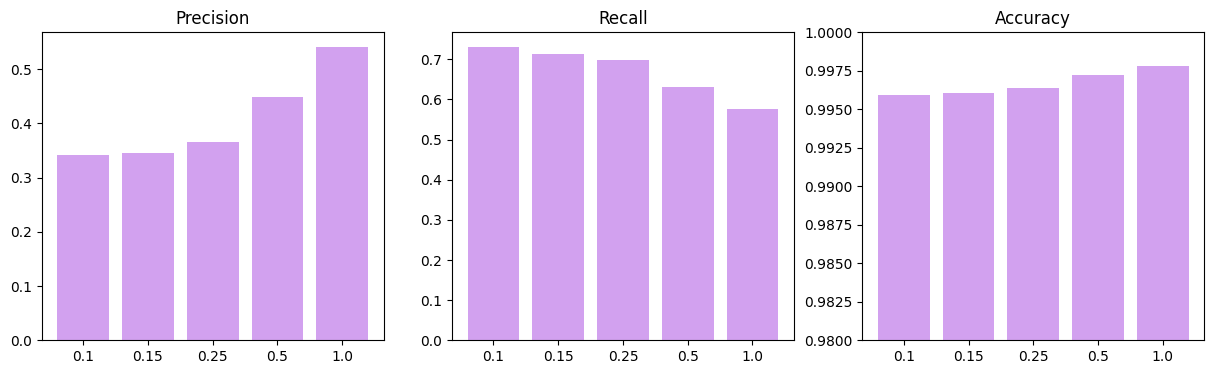

In [15]:
plt.figure(figsize=(15, 4))
thresholds_x = ['0.1', '0.15', '0.25', '0.5', '1.0']

plt.subplot(131)
plt.title("Precision")
plt.bar(thresholds_x,precisions, color='#D2A1EF')

plt.subplot(132)
plt.title("Recall")
plt.bar(thresholds_x,recalls, color='#D2A1EF')

plt.subplot(133)
plt.title("Accuracy")
plt.bar(thresholds_x,accuracies, color='#D2A1EF')
plt.ylim(0.98, 1)

plt.show()

<html><font size=4><B>3. Πρόβλεψη συνδέσμων βάσει similarity-based μετρικών</B></font>    
        <li><B>3(i).</B> Προτείνετε μια τουλάχιστον μέθοδο, για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα NumPy ή SciPy ή Pandas την συσχέτιση (correlation) μεταξύ των τιμών των μετρικών <B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B> για τον μειωμένο γράφο $G'$. Σημ.: Δεν χρειάζεται κάποια υλοποίηση, μόνο αναφορά της μεθόδου συσχέτισης και επεξήγηση της επιλογής σας.
     <li><B>3(ii).</B> Εργαστείτε πάνω σε <B><U>αντίγραφο</U></B> του dataframe που κατασκευάσατε στο ερώτημα 1(vα) (unconnected+removables). Δημιουργήστε στήλη (column) με τις ακμές του γράφου και θέστε την ως index του dataframe. Στο dataframe θα προσθέσετε ως στήλες τις τιμές των μετρικών (<B>Jaccard Coefficient</B>, <B>Preferential Attachment</B>, <B>Resource Allocation</B>) για τον μειωμένο γράφο $G'$. Οι τιμές των μετρικών μπορούν να υπολογιστούν με τις συναρτήσεις του πακέτου NetworkX.</li>   </font></html>
    
    |       | link  |Jacc.Coeff.|Pr.Attachment| Resource Allocation|
    |-------|-------|-----------|-------------|--------------------|
    |(1, 6) |  0    |  0.333333 |     32      |    0.700000        |
    |(1, 46)|  0    |  0.200000 |      8      |    0.166667        |

3(i)

Για να εξερευνήσουμε και να εκφράσουμε μέσα από τα πακέτα αυτά τη συσχέτιση μεταξύ των τιμών των μετρικών Jaccard Coefficient, Preferential Attachment, Resource Allocation για τον γράφο G', μπορούμε να κάνουμε χρήση της .corr() μεθόδου πάνω στις συγκεκριμένες columns του dataframe df. Από τον πίνακα επιστροφής του μεθόδου θα μπορούσαμε να δούμε τη συσχέτιση μεταξύ των τιμών των μετρικών για όλο το dataframe. Από τις πιθανές μεθόδους υπολογισμού συσχέτισης της συνάρτησης, καθώς δεν γνωρίζουμε αν τα δεδομένα μας έχουν γραμμική συσχέτιση μεταξύ τους, θα ήταν καλύτερο να χρησιμοποιήσουμε τη Spearman ή την Kendall, έναντι της Pearson που ενδείκνυται για linear σχέσεις.

In [16]:
#3(ii)
#replicate of the dataframe "unconnected+removables"---dataframe will be used again in (4)
df = df3.copy()

In [17]:
#dataframe for similarity-based measurement values
#Jaccard Coefficient
jc = [p for u,v,p in nx.jaccard_coefficient(G_reduced)]
#Preferential Attachment
pa = [p for u,v,p in nx.preferential_attachment(G_reduced)]
#Resource Allocation
ra = [p for u,v,p in nx.resource_allocation_index(G_reduced)]

#modify dataframe
df["Jaccard Coefficient"] = jc
df["Preferential Attachment"] = pa
df["Resource Allocation"] = ra
df.set_index("Edge")

,Link,Jaccard Coefficient,Preferential Attachment,Resource Allocation
Edge,,,,
"(1, 2)",1,0.0,1,0.0
"(1, 3)",1,0.0,2,0.0
"(1, 4)",1,0.0,1,0.0
"(3, 4)",1,0.0,7,0.0
"(3, 5)",1,0.0,1,0.0
...,...,...,...,...
"(425, 429)",0,0.0,1,0.0
"(426, 427)",0,0.0,2,0.0
"(426, 428)",0,0.0,1,0.0


<li><B>3(iiiα).</B> Χρησιμοποιήστε τον Random Forest Classifier και το αντίγραφο dataframe που κατασκευάσατε στο ερώτημα 3(ii), για να προβλέψετε συνδέσεις. Συμπληρώστε στον κώδικα: τα features ($X$), την target variable ($y$) και τα ορίσματα της συνάρτησης $fit$ για το training του μοντέλου.</li>
<li><B>3(iiiβ).</B> Δώστε τις ($A.M$ $mod$ $10$) πρώτες προβλέψεις και την ακρίβεια ($accuracy$) του μοντέλου. </li>
<li><B>3(iiiγ).</B>Υπολογίστε την πιθανότητα να συνδεθούν οι κόμβοι ($1$,$47$) βάσει του μοντέλου σας. </li>  

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

X = np.array([df["Jaccard Coefficient"], df["Preferential Attachment"], df["Resource Allocation"]]).T #features
y = df['Link'] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [19]:
classifier = RandomForestClassifier()

from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

parameters = {'n_estimators' : [10,50,100], 'max_depth' : [5,10,15]}
model = GridSearchCV(classifier, param_grid = parameters)

In [20]:
model.fit(X_train_scaled, y_train)#train the model, uncomment and complete

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [10, 50, 100]})

In [21]:
predictions = model.predict(X_test_scaled)
print("Predictions for first 2 elements are: ")
print(predictions[:2]) #get (A.M. last digit=2) first predictions
print("Model accuracy is: ")
print(accuracy_score(y_test, predictions))

Predictions for first 2 elements are: 
[0 0]
Model accuracy is: 
0.997519042437432


In [22]:
row = df.loc[df['Edge'] == (1, 47)]
X_new = np.array([row["Jaccard Coefficient"], row["Preferential Attachment"], row["Resource Allocation"]]).T
X_new_scaled = mm_scaler.fit_transform(X_new)
predict_proba = model.predict_proba(X_new_scaled)
print("Probability for edge to be formed between nodes 1 and 47 is: ")
print(predict_proba[0][1]) #desired spot in the array, class that represents existence of link

Probability for edge to be formed between nodes 1 and 47 is: 
0.0


<html><font size=4><B>4. Πρόβλεψη συνδέσμων με embedding βασισμένο σε τυχαίους περιπάτους (Random Walks) </B></font><BR><BR>
    <li><B>4(i).</B> Εξάγετε τα χαρακτηριστικά (features) του γράφου $G'$, που προέκυψε από την αφαίρεση των ακμών. Για τον σκοπό αυτό χρησιμοποιήστε τον αλγόριθμο <B>Node2vec</B> <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>. Ο αλγόριθμος αντιστοιχίζει τους κόμβους του γράφου μέσω τυχαίων περιπάτων (biased 2nd order random walks) σε ένα χώρο μικρού αριθμού διαστάσεων (low dimensional space) διατηρώντας την μεταξύ τους γειτνίαση.
        <BR>Για την επιλογή των παραμέτρων:
            <li>p - παράμετρος τυχαίων περιπάτων p που καθορίζει την πιθανότητα “1/p” επιστροφής στον κόμβο προέλευσης (source node), </li>
                <li>q - παράμετρος τυχαίων περιπάτων q που καθορίζει την πιθανότητα  “1/q” μετακίνησης σε κόμβο μακριά από τον κόμβο προέλευσης (source node), </li>
                 <li>dimensions - πλήθος διαστάσεων των Node2Vec embeddings, </li>
                     <li>num_walks - αριθμός περιπάτων από κάθε κόμβο, </li>
                         <li>walk_length - μήκος τυχαίου περιπάτου, </li>
                             <li>window_size - μέγεθος παραθύρου context για τον αλγόριθμο Word2Vec, </li><li>num_iter - αριθμός SGD επαναλήψεων (epochs), </li>
            <li>workers - αριθμός workers για τον Word2Vec,</li>
            χρησιμοποιήστε τις τιμές:   </html>
   
                   

 |   p   |   q   | dimensions|  num_walks  |walk_length |window_size|        workers            |
 |-------|-------|-----------|-------------|------------|-----------|---------------------------|
 |  1.0  |  1.0  |  128      |     10      |    80      |     10    |multiprocessing.cpu_count()|

In [23]:
!pip install node2vec
#install node2vec with conda / pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [24]:
from node2vec import Node2Vec
import multiprocessing

#generate walks
node2vec_walker = Node2Vec(G_reduced, p=1, q=1, dimensions=128, num_walks=10, walk_length=80, workers = multiprocessing.cpu_count())

#train node2vec model
n2v_model = node2vec_walker.fit(window=10 , min_count=1)

Computing transition probabilities:   0%|          | 0/430 [00:00<?, ?it/s]

<html><font>
    <li><B>4(ii).</B> Εφαρμόστε τον αλγόριθμο Random Forest Classifier, για να προβλέψετε τις συνδέσεις.</li><BR>
    <li><B>4(iii).</B> Υπολογίστε την ακρίβεια ($accuracy$) του μοντέλου. </li><BR></font></html>

In [25]:
#4(ii)
#apply trained Node2Vec model on each node pair of the dataframe "unconnected+removables"
X = [(n2v_model.wv[(i)] + n2v_model.wv[(j)]) for i, j in df3['Edge']]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [28]:
#4(iii)
predictions = classifier.predict(X_test)
print("Model accuracy is: ")
print(accuracy_score(y_test, predictions))

Model accuracy is: 
0.997519042437432


<html><font size=4> <B><U>Ερώτηση bonus (+10/100)</U><B>: </font>Για τους binary operators για learning των edge features με τον αλγόριθμο Node2Vec που αναφέρονται στο <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a> ((α) Average, (β) Hadamard, (γ) Weighted-L1 και (δ) Weighted-L2) τροποποιήστε τoν κώδικά σας και σημειώστε τις παρατηρήσεις σας ως προς την απόδοση του αλγορίθμου.</font></html>

<html><font size=4><B><U>Βιβλιογραφία:</U></B><BR></font>
<a href="https://dl.acm.org/doi/10.1145/2487788.2488173">[1]	Jérôme Kunegis. KONECT – The Koblenz Network Collection. In Proc. Int. Conf. on World Wide Web Companion, pages 1343–1350, 2013.</a><BR>
<a href="https://link.springer.com/chapter/10.1007/978-3-540-76298-0_52">[2]	Sören Auer, Christian Bizer, Georgi Kobilarov, Jens Lehmann, Richard Cyganiak, and Zachary Ives. DBpedia: A nucleus for a web of open data. In Proc. Int. Semant. Web Conf., pages 722–735, 2008.<BR>
<a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3] A. Grover, J. Leskovec, Node2vec: Scalable Feature Learning for Networks. ACM KDD, 2016.</a><BR>
 <a href="https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf">[4] T.Mikolov, I.Sutskever, K.Chen, G.S.Corrado and J.Dean, Distributed representations of words and phrases and their compositionality. In NIPS, 2013.</a><BR></font></html>

Απο τη βιβλιογραφία <a href="https://cs.stanford.edu/~jure/pubs/node2vec-kdd16.pdf">[3]</a>:


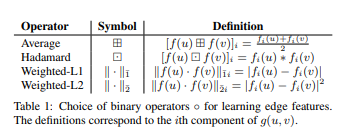

Επαναλαμβάνω τον κώδικα για τα unconnected_pairs λόγω λάθους που δεν επηρεάζει τα προηγούμενα αποτελέσματα (κόμβος 0) αλλά χρειάζεται για τους binary operators.

In [199]:
nodes = list(dbpedia.nodes())
unconnected_node_pairs = [] #list of tuples of ints
for i in range(initial_node_count):
  for j in range(i+1, initial_node_count):
    if (adj_matrix[i][j] == 0):
      unconnected_node_pairs.append((nodes[i], nodes[j]))

total = unconnected_node_pairs + removable_edges

In [204]:
from node2vec.edges import AverageEmbedder
from node2vec.edges import HadamardEmbedder
from node2vec.edges import WeightedL1Embedder
from node2vec.edges import WeightedL2Embedder

In [214]:
embedders = []
embedders.append(AverageEmbedder)
embedders.append(HadamardEmbedder)
embedders.append(WeightedL1Embedder)
embedders.append(WeightedL2Embedder)

In [215]:
def embedding_method_accuracy (embedding_method):

  binary = embedding_method(keyed_vectors=n2v_model.wv)

  X_n2v = [binary[(str(i), str(j))] for i, j in total]
  Y_n2v = y

  x_train, x_test, y_train, y_test = train_test_split(X_n2v, Y_n2v, test_size=0.33, random_state = 0)

  classifier = RandomForestClassifier(max_depth=2, random_state=0)

  classifier.fit(x_train, y_train)

  predictions = classifier.predict(x_test)

  return accuracy_score(y_test, predictions)

In [216]:
from tqdm import tqdm
for em in tqdm(embedders):
  print("Accuracy is")
  print(embedding_method_accuracy(em))

  0%|          | 0/4 [00:00<?, ?it/s]

Accuracy for <class 'node2vec.edges.AverageEmbedder'>


 25%|██▌       | 1/4 [00:16<00:49, 16.47s/it]

0.9977247996834504
Accuracy for <class 'node2vec.edges.HadamardEmbedder'>


 50%|█████     | 2/4 [00:30<00:30, 15.28s/it]

0.9977247996834504
Accuracy for <class 'node2vec.edges.WeightedL1Embedder'>


 75%|███████▌  | 3/4 [00:45<00:15, 15.05s/it]

0.9977247996834504
Accuracy for <class 'node2vec.edges.WeightedL2Embedder'>


100%|██████████| 4/4 [01:00<00:00, 15.13s/it]

0.9977247996834504


Παρατηρούμε ότι για τον κάθε operator η εκτέλεση του prediction παίρνει την ίδια ώρα και αποδίδει το ίδιο accuracy.